Notebook where to plot the curves and display the performance of all models in 
a chosen folder. It is also where to conduct the performance analysis about the
models database.

It plots the mcurves when UYkBioBank has been trained with the tops considered as separated branches (whereas HCP is trained with the tops included in simple surfaces)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp

from contrastive.utils.models_database import import_bdd

In [2]:
import os

def last_part(path):
    return os.sep.join(path.rsplit(r"/")[-2:])

## Use the different-n database

In [3]:
database_path = "/neurospin/dico/data/deep_folding/papers/miccai2023/Output/contrastive/summary/bdd_HCP-UkBioBank-with-top_different-n_evaluation-ACCpatterns-1.csv"
bdd = pd.read_csv(database_path, index_col=0)
bdd.sort_values(by='auc', ascending=False, inplace=True)
bdd.loc[bdd.dataset_name.str.contains("UkBioBank"), "dataset_name"] = "UKBioBank"
bdd.loc[bdd.dataset_name.str.contains("ACCpatterns"), "dataset_name"] = "ACC-1"
bdd.loc[bdd.dataset_name.str.contains("HCP"), "dataset_name"] = "HCP-2"

In [4]:
bdd = bdd.copy()
bdd["model_name"] = "=0"
bdd["model_name"] = bdd.model_path.apply(lambda x: x.split(sep='/')[-2])
bdd.loc[bdd.dataset_name=="ACC","model_name"] = "cingulate_ACCpatterns_0_n=171"
bdd.loc[bdd.model_name=="all","model_name"] = "cingulate_HCP_n=1101"
bdd.loc[bdd.model_path.str.contains("n=1114"),"model_name"] = "cingulate_UkBioBank_n=1101"
bdd["n"] = -1
bdd["n"] = bdd.model_name.apply(lambda x: int(x.split(sep='=')[-1]))
bdd["n"] = bdd.apply(lambda x: x["nb_subjects"] if x["nb_subjects"]>=0 else x["n"], axis=1)
bdd["short_model_path"] = bdd.model_path.apply(last_part)
bdd[["auc", "nb_subjects", "n", "dataset_name", "model_name", "short_model_path"]][bdd.short_model_path.str.contains("10000")].sort_values(by='n')

,auc,nb_subjects,n,dataset_name,model_name,short_model_path


(0.5, 0.8)

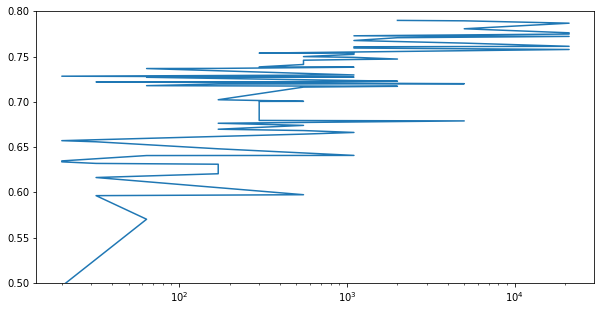

In [5]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(bdd.n, bdd.auc)
ax.set_xscale("log")
ax.set_ylim([0.5,0.8])

(0.5, 0.8)

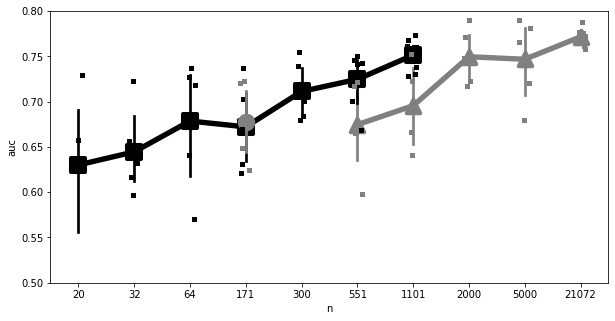

In [6]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.pointplot(data=bdd, x=bdd.n, y="auc", palette=['grey', 'black', 'grey'],markers=['^', 's','o'], hue='dataset_name', linestyles=['-','-','-'], scale=2,ax=ax)
sns.stripplot(data=bdd, x=bdd.n, y="auc", marker='s', palette=['grey', 'black', 'grey'], hue='dataset_name', jitter=1, ax=ax)
ax.legend([],[], frameon=False)
ax.set_ylim([0.5,0.8])
# ax.set_xscale('log')

In [7]:
bdd[bdd.n==551]["auc"].mean()

0.7018680966782728